## 分类问题

### BP网络实现

#### 结构一实现

Iteration 0, cost: 1.0053354170819562
Iteration 50, cost: 0.2484358141872768
Iteration 100, cost: 0.24595211214677942
Iteration 150, cost: 0.24321893019050198
Iteration 200, cost: 0.23894899271296857
Iteration 250, cost: 0.23205555836539876
Iteration 300, cost: 0.22150731211801478
Iteration 350, cost: 0.20648250242673127
Iteration 400, cost: 0.18616520242402346
Iteration 450, cost: 0.159550104970358
Iteration 500, cost: 0.12655796399257668
Iteration 550, cost: 0.089952148552431
Iteration 600, cost: 0.055434073628997535
Iteration 650, cost: 0.028995372953685372
Iteration 700, cost: 0.012926555420385937
预测结果: [[0.05644243 0.91668024 0.89521278 0.13287872]]
真实标签: [[0 1 1 0]]


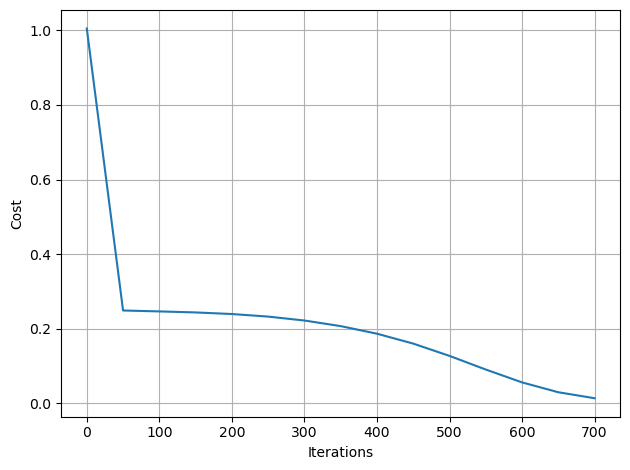

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 激活函数 sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid的导数
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR数据集
xor_x = np.array([[0,0], [1,0], [0,1], [1,1]])      # row->sample
xor_y = np.array([0, 1, 1, 0]).reshape(1, -1)       # col->sample

# 随机打乱数据
def shuffle_data(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], Y[:, indices]

# 初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.5          # W1：输入层到隐藏层的权重
    W2 = np.random.randn(n_y, n_h) * 0.5          # W2：隐藏层到输出层的权重
    b1 = np.zeros((n_h, 1))                       # 隐藏层的偏置
    b2 = np.zeros((n_y, 1))                       # 输出层的偏置

    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return parameters

# 前向传播
def forward_propagate(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X.T) + b1                     # 计算隐藏层输入
    A1 = sigmoid(Z1)                              # 激活函数

    Z2 = np.dot(W2, A1) + b2                      # 计算输出层输入
    A2 = Z2                                       # 输出层线性输出（回归问题使用）

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

# 计算损失
def calculate_cost(A2, Y):
    err = A2 - Y
    cost = np.dot(err, err.T) / Y.shape[1]
    return cost

# 反向传播
def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]                                # 样本数

    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = (A2 - Y)                                # 输出层误差
    dW2 = np.dot(dZ2, A1.T) / m                   # 输出层权重梯度
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m  # 输出层偏置梯度

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)  # 隐藏层误差
    dW1 = np.dot(dZ1, X) / m                      # 隐藏层权重梯度
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m  # 隐藏层偏置梯度

    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

    return grads

# 更新参数
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']

    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    return parameters

# 训练神经网络
def train(X, Y, num_iterations, learning_rate, print_cost=False):
    n_x = X.shape[1]    # 输入层神经元数
    n_h = 3             # 隐藏层神经元数
    n_y = Y.shape[0]    # 输出层神经元数

    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(num_iterations):
        # 随机打乱数据
        X_shuffled, Y_shuffled = shuffle_data(X, Y)

        # 前向传播
        A2, cache = forward_propagate(X_shuffled, parameters)

        # 计算损失
        cost = calculate_cost(A2, Y_shuffled)

        # 反向传播
        grads = backward_propagate(parameters, cache, X_shuffled, Y_shuffled)

        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)

        # 打印损失
        if print_cost and i % 50 == 0:
            print(f"Iteration {i}, cost: {cost[0][0]}")
            costs.append(cost[0][0])

        # 早停条件
        if cost < 0.01:
            break

    return parameters, costs

# 训练模型
parameters, costs = train(xor_x, xor_y, 10000, 0.5, print_cost=True)

# 前向传播查看结果
A2, _ = forward_propagate(xor_x, parameters)
print("预测结果:", A2)
print("真实标签:", xor_y)

# 绘制损失曲线
plt.plot(np.arange(len(costs)) * 50, costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 结构二实现

Cost after iteration: 0, cost: 1.08110874580913
Cost after iteration: 50, cost: 0.9999972236447932
Cost after iteration: 100, cost: 0.9999944121627142
Cost after iteration: 150, cost: 0.9999907306734968
Cost after iteration: 200, cost: 0.9999854110872228
Cost after iteration: 250, cost: 0.9999770067670131
Cost after iteration: 300, cost: 0.9999624190788279
Cost after iteration: 350, cost: 0.9999339586980006
Cost after iteration: 400, cost: 0.9998682567350561
Cost after iteration: 450, cost: 0.9996669419314954
Cost after iteration: 500, cost: 0.9985354946842653
Cost after iteration: 550, cost: 0.9424998662377435
Cost after iteration: 600, cost: 0.01783209792812925
Cost after iteration: 650, cost: 3.84541778047104e-05
[[-0.99503755  0.99212455  0.99503753 -0.99503758]] [[0 1 1 0]]


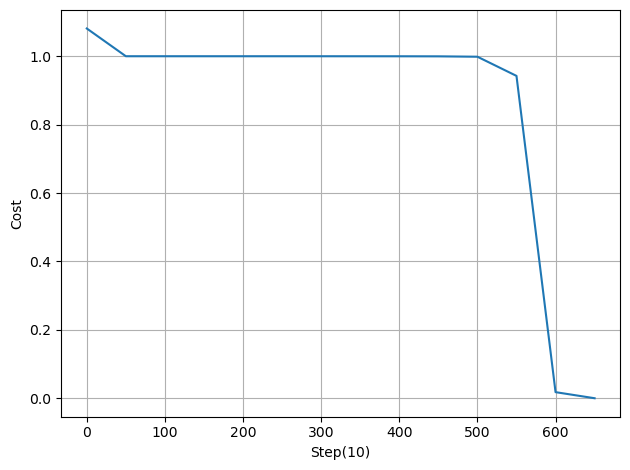

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters():
    np.random.seed(2)
    parameters = {
        'w10': np.random.randn(1, 1) * 0.1,
        'w20': np.random.randn(1, 1) * 0.1,
        'w13': np.random.randn(1, 1) * 0.1,
        'w12': np.random.randn(1, 1) * 0.1,
        'w14': np.random.randn(1, 1) * 0.1,
        'w23': np.random.randn(1, 1) * 0.1,
        'w24': np.random.randn(1, 1) * 0.1
    }
    return parameters

def forward_propagate(X, parameters):
    w10, w20 = parameters['w10'], parameters['w20']
    w13, w12, w14 = parameters['w13'], parameters['w12'], parameters['w14']
    w23, w24 = parameters['w23'], parameters['w24']

    W2 = np.array([w23, w24]).reshape(2, 1)
    W1 = np.array([w13, w14]).reshape(2, 1)
    Z2 = np.dot(W2.T, X.T) - w20
    A2 = (1 - np.exp(-Z2)) / (1 + np.exp(-Z2))

    Z1 = np.dot(W1.T, X.T) + w12 * A2 - w10
    A1 = Z1

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return Z1, cache

def calculate_cost(A2, Y, parameters):
    err = A2 - Y
    cost = np.dot(err, err.T) / Y.shape[1]
    return cost

def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]  # Number of samples

    w12 = parameters['w12']

    A1, A2 = cache['A1'], cache['A2']

    dZ1 = A1 - Y
    d10 = -np.sum(dZ1, axis=1, keepdims=True) / m
    d13 = np.dot(dZ1, X.T[0].T) / m
    d12 = np.dot(dZ1, A2.T) / m
    d14 = np.dot(dZ1, X.T[1].T) / m

    dZ2 = w12 * dZ1 * (1 - np.power(A2, 2))
    d23 = np.dot(dZ2, X.T[0].T) / m
    d24 = np.dot(dZ2, X.T[1].T) / m
    d20 = -np.sum(dZ2, axis=1, keepdims=True) / m

    grads = {'d10': d10, 'd20': d20, 'd13': d13, 'd12': d12, 'd14': d14, 'd23': d23, 'd24': d24}
    return grads

def update_parameters(parameters, grads, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads['d' + key[1:]]
    return parameters

def train(X, Y, num_iterations, learning_rate, print_cost=False):
    parameters = initialize_parameters()
    costdim = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X, parameters)
        cost = calculate_cost(A2, Y, parameters)
        grads = backward_propagate(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 50 == 0:
            print(f"Cost after iteration: {i}, cost: {cost[0][0]}")
            costdim.append(cost[0][0])

            if cost < 0.01:
                break

    return parameters, costdim

parameters, costdim = train(xor_x0, xor_y0, 1000, 0.5, True)

A2, cache = forward_propagate(xor_x0, parameters)
print(A2, xor_y)

plt.plot(np.arange(len(costdim)) * 50, costdim)
plt.xlabel("Step(10)")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


### 三类分类问题

#### 单隐层bp网络分类

Cost after iteration 0: 3.4575033059379665
Cost after iteration 500: 2.25887488054015
Cost after iteration 1000: 1.4787827814052472
Cost after iteration 1500: 1.3076722659591566
Cost after iteration 2000: 1.2674987234278856
Cost after iteration 2500: 1.2237042659074944
Cost after iteration 3000: 1.1414899254767161
Cost after iteration 3500: 0.9718258436057811
Cost after iteration 4000: 0.7239126084717658
Cost after iteration 4500: 0.5607186999757787
Cost after iteration 5000: 0.5015739756798159
Cost after iteration 5500: 0.47903287226403435
Cost after iteration 6000: 0.46829681268781864
Cost after iteration 6500: 0.46253109740219805
Cost after iteration 7000: 0.4592705014578297
Cost after iteration 7500: 0.45731065664864623
Cost after iteration 8000: 0.45600794028462815
Cost after iteration 8500: 0.45503947009576173
Cost after iteration 9000: 0.45425452640052844
Cost after iteration 9500: 0.45358358102040824
[0, 0, 1, 0, 0, 0, 0, 0, 0] 1


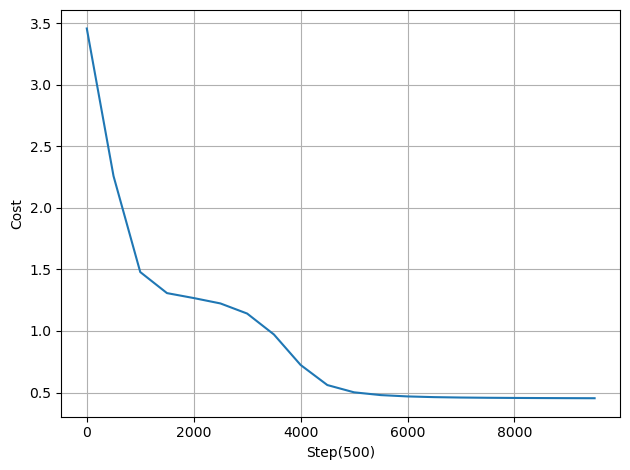

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([[0.25, 0.25], [0.75, 0.125], [0.25, 0.75],
                   [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                   [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data = np.array([[1, -1, -1], [1, -1, -1], [1, -1, -1],
                   [-1, 1, -1], [-1, 1, -1], [-1, 1, -1],
                   [-1, -1, 1], [-1, -1, 1], [-1, -1, 1]]).T

def shuffle_data(X, Y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], Y[:, idx]

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.5
    W2 = np.random.randn(n_y, n_h) * 0.5
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

def forward_propagate(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = np.dot(W1, X.T) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    return A2, {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

def calculate_cost(A2, Y):
    err = A2 - Y
    cost = np.mean(np.sum(err**2, axis=0))
    return cost

def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]
    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

def train(X, Y, num_iterations, learning_rate, print_cost=False):
    n_x, n_h, n_y = 2, 5, 3
    parameters = initialize_parameters(n_x, n_h, n_y)
    X_shuffled, Y_shuffled = shuffle_data(X, Y)
    cost_list = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X_shuffled, parameters)
        cost = calculate_cost(A2, Y_shuffled)
        grads = backward_propagate(parameters, cache, X_shuffled, Y_shuffled)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 500 == 0:
            print(f'Cost after iteration {i}: {cost}')
            cost_list.append(cost)
            if cost < 0.1:
                break

    return parameters, cost_list

parameters, costdim = train(x_data, y_data, 10000, 0.5, True)

A2, cache = forward_propagate(x_data, parameters)
A2_binary = np.where(A2 >= 0, 1, -1)
res = [1 if not np.array_equal(a2, y) else 0 for a2, y in zip(A2_binary.T, y_data.T)]
print(res, sum(res))

plt.plot(np.arange(len(costdim)) * 500, costdim)
plt.xlabel("Step(500)")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()
